# Match Result Prediction Notebook

This notebook focuses on preparing and analyzing football match data with the aim of developing a prediction model. It includes steps for data loading, cleaning, exploratory data analysis (EDA), and building a predictive model.

In [1]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading match data from a CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\santo\OneDrive\Documents\R unit 2\Programming\Matches.csv", index_col=0)

In [3]:
# Displaying the first few rows of the dataset to understand its structure
df.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,team
0,8/13/2023,16:30,Sun,Away,D,1,1,Chelsea,1.3,1.4,35.0,40096.0,13.0,1.0,17.8,0.0,0,0.0,2024,Liverpool
1,8/19/2023,15:00,Sat,Home,W,3,1,Bournemouth,3.0,1.3,64.0,53145.0,25.0,9.0,16.8,1.0,0,1.0,2024,Liverpool
2,8/27/2023,16:30,Sun,Away,W,2,1,Newcastle Utd,0.9,2.0,41.0,52214.0,9.0,4.0,17.2,1.0,0,0.0,2024,Liverpool
3,9/3/2023,14:00,Sun,Home,W,3,0,Aston Villa,2.5,0.7,63.0,50109.0,17.0,4.0,14.7,0.0,0,0.0,2024,Liverpool
4,9/16/2023,12:30,Sat,Away,W,3,1,Wolves,2.5,0.6,65.0,31257.0,16.0,5.0,15.8,0.0,0,0.0,2024,Liverpool


In [4]:
# Cleaning and preparing the data by adjusting formats and converting types
df['result'] = df['result'].replace(['L', 'D','W'], ['0', '1', '3'])
df= df.apply(pd.to_numeric, errors='ignore')
df.dtypes

date           object
time           object
day            object
venue          object
result          int64
gf              int64
ga              int64
opponent       object
xg            float64
xga           float64
poss          float64
attendance    float64
sh            float64
sot           float64
dist          float64
fk            float64
pk              int64
pkatt         float64
season          int64
team           object
dtype: object

In [5]:
# Checking for missing values in the dataset
df.isnull().sum()

date             0
time          6080
day              0
venue            0
result           0
gf               0
ga               0
opponent         0
xg            7600
xga           7600
poss          6080
attendance    1926
sh            6080
sot           6080
dist          7603
fk            7600
pk               0
pkatt         6080
season           0
team             0
dtype: int64

In [6]:
df.fillna(0, inplace=True)

In [7]:
# Checking for missing values in the dataset
df.isnull().sum()

date          0
time          0
day           0
venue         0
result        0
gf            0
ga            0
opponent      0
xg            0
xga           0
poss          0
attendance    0
sh            0
sot           0
dist          0
fk            0
pk            0
pkatt         0
season        0
team          0
dtype: int64

In [8]:
df["team"].value_counts()

team
Liverpool                   630
Arsenal                     630
Tottenham Hotspur           630
Manchester United           630
Chelsea                     630
Everton                     630
Manchester City             629
West Ham United             592
Newcastle United            592
Aston Villa                 554
Fulham                      440
Southampton                 380
Crystal Palace              364
Sunderland                  342
West Bromwich Albion        342
Stoke City                  342
Wolverhampton Wanderers     326
Leicester City              304
Burnley                     288
Wigan Athletic              266
Brighton and Hove Albion    250
Watford                     228
Norwich City                228
Blackburn Rovers            228
Bolton Wanderers            228
Swansea City                228
Bournemouth                 211
Hull City                   152
Portsmouth                  152
Sheffield United            136
Birmingham City             114
Mid

In [9]:
df.dtypes

date           object
time           object
day            object
venue          object
result          int64
gf              int64
ga              int64
opponent       object
xg            float64
xga           float64
poss          float64
attendance    float64
sh            float64
sot           float64
dist          float64
fk            float64
pk              int64
pkatt         float64
season          int64
team           object
dtype: object

In [10]:
# Displaying the first few rows of the dataset to understand its structure
df.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,team
0,8/13/2023,16:30,Sun,Away,1,1,1,Chelsea,1.3,1.4,35.0,40096.0,13.0,1.0,17.8,0.0,0,0.0,2024,Liverpool
1,8/19/2023,15:00,Sat,Home,3,3,1,Bournemouth,3.0,1.3,64.0,53145.0,25.0,9.0,16.8,1.0,0,1.0,2024,Liverpool
2,8/27/2023,16:30,Sun,Away,3,2,1,Newcastle Utd,0.9,2.0,41.0,52214.0,9.0,4.0,17.2,1.0,0,0.0,2024,Liverpool
3,9/3/2023,14:00,Sun,Home,3,3,0,Aston Villa,2.5,0.7,63.0,50109.0,17.0,4.0,14.7,0.0,0,0.0,2024,Liverpool
4,9/16/2023,12:30,Sat,Away,3,3,1,Wolves,2.5,0.6,65.0,31257.0,16.0,5.0,15.8,0.0,0,0.0,2024,Liverpool


In [11]:
# Cleaning and preparing the data by adjusting formats and converting types
df["venue_code"] = df["venue"].astype("category").cat.codes
df["opp_code"] = df["opponent"].astype("category").cat.codes
df["hour"] = df["time"].astype(str).str.replace(":.+", "", regex=True).astype(int)
df['date'] = pd.to_datetime(df['date'])
df["day_code"] = df["date"].dt.dayofweek
df.dtypes

date          datetime64[ns]
time                  object
day                   object
venue                 object
result                 int64
gf                     int64
ga                     int64
opponent              object
xg                   float64
xga                  float64
poss                 float64
attendance           float64
sh                   float64
sot                  float64
dist                 float64
fk                   float64
pk                     int64
pkatt                float64
season                 int64
team                  object
venue_code              int8
opp_code                int8
hour                   int32
day_code               int32
dtype: object

In [12]:
# Displaying the first few rows of the dataset to understand its structure
df.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
0,2023-08-13,16:30,Sun,Away,1,1,1,Chelsea,1.3,1.4,...,17.8,0.0,0,0.0,2024,Liverpool,0,12,16,6
1,2023-08-19,15:00,Sat,Home,3,3,1,Bournemouth,3.0,1.3,...,16.8,1.0,0,1.0,2024,Liverpool,1,6,15,5
2,2023-08-27,16:30,Sun,Away,3,2,1,Newcastle Utd,0.9,2.0,...,17.2,1.0,0,0.0,2024,Liverpool,0,26,16,6
3,2023-09-03,14:00,Sun,Home,3,3,0,Aston Villa,2.5,0.7,...,14.7,0.0,0,0.0,2024,Liverpool,1,1,14,6
4,2023-09-16,12:30,Sat,Away,3,3,1,Wolves,2.5,0.6,...,15.8,0.0,0,0.0,2024,Liverpool,0,42,12,5


In [13]:
columns_to_delete = ['time', 'day','venue']

# Deleting multiple columns
df.drop(columns_to_delete, axis=1, inplace=True)

In [14]:
# Displaying the first few rows of the dataset to understand its structure
df.head()
df.dtypes

date          datetime64[ns]
result                 int64
gf                     int64
ga                     int64
opponent              object
xg                   float64
xga                  float64
poss                 float64
attendance           float64
sh                   float64
sot                  float64
dist                 float64
fk                   float64
pk                     int64
pkatt                float64
season                 int64
team                  object
venue_code              int8
opp_code                int8
hour                   int32
day_code               int32
dtype: object

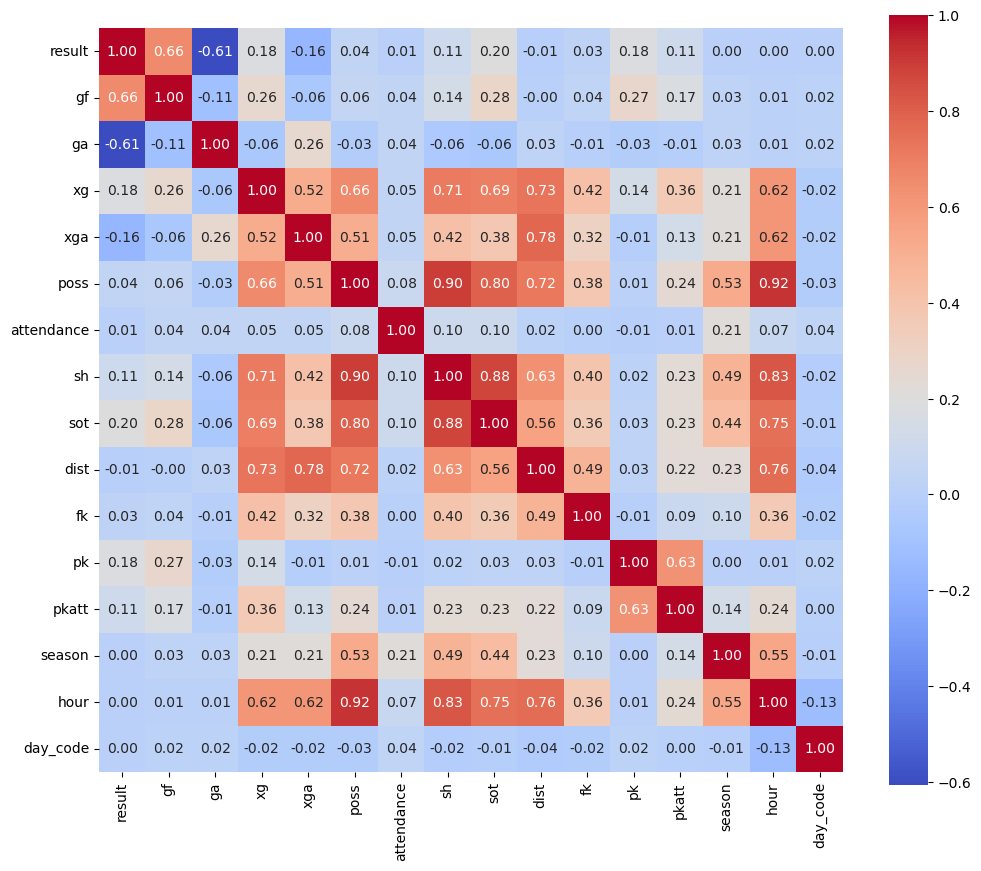

In [15]:
# Importing necessary libraries for data manipulation and visualization
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show plot
plt.show()

In [16]:
df.dtypes

date          datetime64[ns]
result                 int64
gf                     int64
ga                     int64
opponent              object
xg                   float64
xga                  float64
poss                 float64
attendance           float64
sh                   float64
sot                  float64
dist                 float64
fk                   float64
pk                     int64
pkatt                float64
season                 int64
team                  object
venue_code              int8
opp_code                int8
hour                   int32
day_code               int32
dtype: object

In [17]:
df["target"] = df["result"]


In [18]:
df.drop('result',axis=1,inplace=True)

In [19]:
df.columns

Index(['date', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'sh',
       'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'team', 'venue_code',
       'opp_code', 'hour', 'day_code', 'target'],
      dtype='object')

In [20]:
train = df[df["date"] < '2023-08-11']
test = df[df["date"] >= '2023-08-11']

In [21]:
# Importing necessary libraries for data manipulation and visualization
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define a parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'min_samples_split': [2, 10, 20],
    'max_depth': [None, 10, 20, 30]
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search model on your training data
grid_search.fit(train.drop(['target', 'date','team','opponent',], axis=1), train['target'])

# Print the best parameters and the best score achieved
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Optionally, you can now train your RandomForestClassifier using the best parameters
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=1)
rf_best.fit(train.drop(['target', 'date','team','opponent'], axis=1), train['target'])


Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9977796052631579


RandomForestClassifier(max_depth=30, n_estimators=50, random_state=1)

In [22]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=2, max_depth=30, random_state=1)

In [23]:
# Importing necessary libraries for data manipulation and visualization
rf.fit(train.drop(['target', 'date','team','opponent'], axis=1), train['target']) 
# Extracting feature importances
feature_importances = rf.feature_importances_

# Mapping feature importances to their corresponding column names
features = train.drop(['target', 'date','team','opponent'], axis=1).columns
importance_dict = dict(zip(features, feature_importances))

# Sorting features by importance
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Displaying sorted feature importances
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


gf: 0.44694826448291575
ga: 0.41512439983083205
attendance: 0.01995101052151683
sot: 0.015348604126107715
xga: 0.014741278522865007
opp_code: 0.01397963452217756
xg: 0.013055087400668708
poss: 0.009597676239213822
sh: 0.00833039984810526
season: 0.008211467713830264
dist: 0.0075892534886646676
day_code: 0.006540190720158149
pk: 0.006249547862791552
venue_code: 0.0057767980531347836
hour: 0.00495092486742865
fk: 0.0019812459465252106
pkatt: 0.0016242158530640953


In [25]:
df = df.drop(['sh', 'poss', 'hour'], axis=1,inplace=True)


KeyError: "['sh', 'poss', 'hour'] not found in axis"

In [26]:
# Displaying the first few rows of the dataset to understand its structure
df.head()

,date,gf,ga,opponent,xg,xga,attendance,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,day_code,target
0,2023-08-13,1,1,Chelsea,1.3,1.4,40096.0,1.0,17.8,0.0,0,0.0,2024,Liverpool,0,12,6,1
1,2023-08-19,3,1,Bournemouth,3.0,1.3,53145.0,9.0,16.8,1.0,0,1.0,2024,Liverpool,1,6,5,3
2,2023-08-27,2,1,Newcastle Utd,0.9,2.0,52214.0,4.0,17.2,1.0,0,0.0,2024,Liverpool,0,26,6,3
3,2023-09-03,3,0,Aston Villa,2.5,0.7,50109.0,4.0,14.7,0.0,0,0.0,2024,Liverpool,1,1,6,3
4,2023-09-16,3,1,Wolves,2.5,0.6,31257.0,5.0,15.8,0.0,0,0.0,2024,Liverpool,0,42,5,3


In [54]:
#These are the predictors we will use in order to predict the results of the games
predictors = ["gf","opp_code", "venue_code", "sot","attendance",  "xga","pk"]
rf.fit(train[predictors], train["target"])
preds = rf.predict(test[predictors])
#We will import accuracy score to check on the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(test["target"], preds)
accuracy
#We will  create a new data frame to compare the results predicted with the actual ones
actual_vs_predicted=pd.DataFrame(dict(actual=test["target"], predicted=preds))
#This shows how many of each result was predicted
pd.crosstab(index=actual_vs_predicted["actual"], columns=actual_vs_predicted["predicted"])

predicted,0,1,3
actual,,,
0,137,22,15
1,36,26,26
3,15,14,145


In [55]:
accuracy

0.7064220183486238

In [56]:
# we will import precision score
from sklearn.metrics import precision_score
#The precision is very similar to our accuracy
precision_score(test["target"], preds,average='micro')
group_results= df.groupby("team")
grouped_matches = df.groupby("team")
group = grouped_matches.get_group("Liverpool").sort_values("date")
group

,date,gf,ga,opponent,xg,xga,attendance,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,day_code,target
1,2006-08-19,1,1,Sheffield Utd,0.0,0.0,31726.0,0.0,0.0,0.0,1,0.0,2015,Liverpool,0,32,5,1
3,2006-08-26,2,1,West Ham,0.0,0.0,45262.0,0.0,0.0,0.0,0,0.0,2015,Liverpool,1,40,5,3
4,2006-09-09,0,3,Everton,0.0,0.0,40004.0,0.0,0.0,0.0,0,0.0,2015,Liverpool,0,15,5,0
6,2006-09-17,0,1,Chelsea,0.0,0.0,41882.0,0.0,0.0,0.0,0,0.0,2015,Liverpool,0,12,6,0
7,2006-09-20,2,0,Newcastle Utd,0.0,0.0,45114.0,0.0,0.0,0.0,0,0.0,2015,Liverpool,1,26,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,2023-12-23,1,1,Arsenal,1.0,0.7,57548.0,3.0,20.1,1.0,0,0.0,2024,Liverpool,1,0,5,1
27,2023-12-26,2,0,Burnley,1.8,0.8,21624.0,10.0,17.4,0.0,0,0.0,2024,Liverpool,0,9,1,3
28,2024-01-01,4,2,Newcastle Utd,7.0,0.6,57471.0,12.0,16.2,0.0,1,2.0,2024,Liverpool,1,26,0,3
31,2024-01-21,4,0,Bournemouth,1.5,1.4,11228.0,7.0,19.2,0.0,0,0.0,2024,Liverpool,0,6,6,3


In [57]:
#we will now be using rolling averages for the columns "gf", "ga", "sh", "sot", "pk" 
#with the aim to improve the quality of our predictions
columns = ["gf", "ga", "sot", "pk"]
columns
new_columns = [f"{c}_rolling" for c in columns]
new_columns

['gf_rolling', 'ga_rolling', 'sot_rolling', 'pk_rolling']

In [58]:
# We will now be using the funtion rolling_averages with the values from group, columns and new_columns
def rolling_averages(group, columns, new_columns):
    group = group.sort_values("date")
    rolling_stats = group[columns].rolling(3, closed='left').mean()
    group[new_columns] = rolling_stats
    group = group.dropna(subset=new_columns)
    return group

rolling_averages(group, columns, new_columns)
df_rolling = df.groupby("team").apply(lambda x: rolling_averages(x, columns, new_columns))
df_rolling
df_rolling = df_rolling.droplevel('team')
df_rolling

df_rolling.index = range(df_rolling.shape[0])
df_rolling

,date,gf,ga,opponent,xg,xga,attendance,sot,dist,fk,...,season,team,venue_code,opp_code,day_code,target,gf_rolling,ga_rolling,sot_rolling,pk_rolling
0,2006-09-17,1,0,Manchester Utd,0.0,0.0,75595.0,0.0,0.0,0.0,...,2015,Arsenal,0,24,6,3,0.666667,1.000000,0.000000,0.333333
1,2006-09-23,3,0,Sheffield Utd,0.0,0.0,59912.0,0.0,0.0,0.0,...,2015,Arsenal,1,32,5,3,0.666667,0.666667,0.000000,0.333333
2,2006-09-30,2,1,Charlton Ath,0.0,0.0,26720.0,0.0,0.0,0.0,...,2015,Arsenal,0,11,5,3,1.666667,0.333333,0.000000,0.333333
3,2006-10-14,3,0,Watford,0.0,0.0,60018.0,0.0,0.0,0.0,...,2015,Arsenal,1,38,5,3,2.000000,0.333333,0.000000,0.000000
4,2006-10-22,4,0,Reading,0.0,0.0,24004.0,0.0,0.0,0.0,...,2015,Arsenal,0,31,6,3,2.666667,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12462,2023-12-24,2,1,Chelsea,1.3,2.0,31641.0,6.0,16.7,1.0,...,2024,Wolverhampton Wanderers,1,12,6,3,0.666667,1.333333,3.666667,0.000000
12463,2023-12-27,4,1,Brentford,2.4,2.2,17109.0,5.0,17.8,0.0,...,2024,Wolverhampton Wanderers,0,7,2,3,1.000000,1.666667,4.333333,0.000000
12464,2023-12-30,3,0,Everton,1.9,0.4,31639.0,6.0,13.4,0.0,...,2024,Wolverhampton Wanderers,1,15,5,3,2.000000,1.666667,4.666667,0.000000
12465,2024-01-22,0,0,Brighton,1.1,1.0,41505.0,3.0,18.6,0.0,...,2024,Wolverhampton Wanderers,0,8,0,1,3.000000,0.666667,5.666667,0.000000


In [59]:
def make_predictions(df, predictors):
    train = df[df["date"] < '2023-08-12']
    test = df[df["date"] >= '2023-08-11']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    acc = precision_score(test["target"], preds,average='micro')
    return combined, acc

In [60]:
make_predictions(df, predictors)
#We will now be creating a combined column with the actual results and the predicted ones
combined, acc = make_predictions(df_rolling, predictors + new_columns)
acc
combined = combined.merge(df_rolling[["date", "team", "opponent", "target"]], left_index=True, right_index=True)
combined
combined.head(10)

,actual,predicted,date,team,opponent,target
605,3,3,2023-08-12,Arsenal,Nott'ham Forest,3
606,3,1,2023-08-21,Arsenal,Crystal Palace,3
607,1,3,2023-08-26,Arsenal,Fulham,1
608,3,3,2023-09-03,Arsenal,Manchester Utd,3
609,3,3,2023-09-17,Arsenal,Everton,3
610,1,3,2023-09-24,Arsenal,Tottenham,1
611,3,3,2023-09-30,Arsenal,Bournemouth,3
612,3,3,2023-10-08,Arsenal,Manchester City,3
613,1,1,2023-10-21,Arsenal,Chelsea,1
614,3,3,2023-10-28,Arsenal,Sheffield Utd,3


In [61]:
#The following is very important as we will be changing the names or abbreviations of some teams to just one common abreviation, this is to prevent inconsistencies as some teams have different names in the dataset
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves","Sheffield United": "Sheffield Utd", "Charlton Athletic": "Charlton Ath","West Bromwich Albion": "West Bromw", "Queens Park Rangers": "QPR", "Nottingham Forest": "Nott'ham Forest"} 
mapping = MissingDict(**map_values)

combined["new_team"] = combined["team"].map(mapping)

combined["predicted points"]=combined["predicted"]
combined["actual points"]=combined["actual"]
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [62]:
# Cleaning and preparing the data by adjusting formats and converting types
new_df = combined[['team','predicted points','actual points']].copy()
new_df['predicted points'] = pd.to_numeric(new_df["predicted points"]) 
new_df['actual points'] = pd.to_numeric(new_df["actual points"]) 

In [63]:
final_table=new_df.groupby('team').sum() 

In [64]:
# Sort the DataFrame based on 'predicted points' column in descending order
sorted_table = final_table.sort_values(by='predicted points', ascending=False)
# Sort the 'predicted points' column in descending order
predicted_points_table = sorted_table[['predicted points']].sort_values(by='predicted points', ascending=False)
# Sort the 'actual points' column in descending order
actual_points_table = sorted_table[['actual points']].sort_values(by='actual points', ascending=False)
# Display the sorted 'predicted points' table
print("Predicted Points Table:")
print(predicted_points_table)
# Display the sorted 'actual points' table
print("\nActual Points Table:")
print(actual_points_table)


Predicted Points Table:
                          predicted points
team                                      
Manchester City                         55
Liverpool                               51
Arsenal                                 46
Tottenham Hotspur                       43
Newcastle United                        41
Aston Villa                             40
Chelsea                                 34
West Ham United                         33
Manchester United                       33
Brighton and Hove Albion                32
Brentford                               31
Bournemouth                             30
Crystal Palace                          28
Everton                                 28
Nottingham Forest                       25
Wolverhampton Wanderers                 21
Fulham                                  19
Luton Town                              19
Sheffield United                        14
Burnley                                 14

Actual Points Table:
        